In [1]:
import numpy as np
import pandas as pd
from collections import Counter

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

In [2]:
def Accuracy(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    
    """
    return np.sum(y_true == y_pred) / len(y_pred)

In [3]:
def Recall(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """

    # labels = []
    # for i in y_true:
    #     if i not in labels:
    #         label_num.append(i)
    # label_num = len(labels)
    # print(label_num)
    
    labels = set(y_true)
    # print(labels)
    # recall_list = []

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # y_t = y_true.copy()
    # y_p = y_pred.copy()

    def calculate_macro_recall(j):

    # for j in labels:

        # print("j: ", j)
        y_t = y_true.copy()
        y_p = y_pred.copy()
        # print("y_t: ", set(y_t))
        # print("y_p: ", set(y_p))
        
        y_t[y_true == j] = 1
        y_p[y_pred == j] = 1

        y_t[y_true != j] = 0
        y_p[y_pred != j] = 0

        # print("y_t: ", set(y_t))
        # print("y_p: ", set(y_p))

        tp = np.sum((y_t == 1) & (y_p == 1))
        tn = np.sum((y_t == 0) & (y_p == 0))
        fp = np.sum((y_t == 0) & (y_p == 1))
        fn = np.sum((y_t == 1) & (y_p == 0))

        # print("tp: ", tp)
        # print("fn: ", fn)

        if (tp + fn) != 0:
            recall_i = tp / (tp + fn)
        else:
            recall_i = 0

        # print(recall_i)
        # recall_list.append(recall_i)

        return recall_i


    recall_list = [calculate_macro_recall(j) for j in labels]
    # print(recall_list)
    
    recall_np = np.array(recall_list)

    mean_recall = np.mean(recall_np)

    return mean_recall

In [4]:
def Precision(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """
    
    labels = set(y_true)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    def calculate_macro_precision(j):

        y_t = y_true.copy()
        y_p = y_pred.copy()
        
        y_t[y_true == j] = 1
        y_p[y_pred == j] = 1

        y_t[y_true != j] = 0
        y_p[y_pred != j] = 0

        tp = np.sum((y_t == 1) & (y_p == 1))
        tn = np.sum((y_t == 0) & (y_p == 0))
        fp = np.sum((y_t == 0) & (y_p == 1))
        fn = np.sum((y_t == 1) & (y_p == 0))

        if (tp + fp) != 0:
            precision_i = tp / (tp + fp)
        else:
            precision_i = 0

        return precision_i


    precision_list = [calculate_macro_precision(j) for j in labels]
    
    precision_np = np.array(precision_list)

    mean_precision = np.mean(precision_np)

    return mean_precision

In [5]:
def SklearnSupervisedLearning(X_train,Y_train,X_test,Y_test):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    :type Y_test: numpy.ndarray
    
    :rtype: List[numpy.ndarray] 
    """

    print('---------------------------------------------------------------------------------------')
    svm = SVC(kernel = 'linear')
    svm.fit(X_train, Y_train)
    y_pred_svm = svm.predict(X_test)
    accuracy_svm0 = Accuracy(Y_test, y_pred_svm)
    print("SVM Accuracy (using our own accuracy function): ", accuracy_svm0)
    # accuracy_svm = svm.score(X_test, Y_test)
    # print("SVM Accuracy: ", accuracy_svm)
    
    print('---------------------------------------------------------------------------------------')
    lg = LogisticRegression()
    lg.fit(X_train, Y_train)
    y_pred_lg = lg.predict(X_test)
    accuracy_lg0 = Accuracy(Y_test, y_pred_lg)
    print("Logistic Regression Accuracy (using our own accuracy function): ", accuracy_lg0)
    # accuracy_lg = lg.score(X_test, Y_test)
    # print("Logistic Regression Accuracy: ", accuracy_lg)

    print('---------------------------------------------------------------------------------------')
    dt = DecisionTreeClassifier()
    dt.fit(X_train, Y_train)
    y_pred_dt = dt.predict(X_test)
    accuracy_dt0 = Accuracy(Y_test, y_pred_dt)
    print("Decision Tree Classifier Accuracy (using our own accuracy function): ", accuracy_dt0)
    # accuracy_dt = dt.score(X_test, Y_test)
    # print("Decision Tree Classifier Accuracy_dt: ", accuracy_dt)

    print('---------------------------------------------------------------------------------------')
    knn = KNeighborsClassifier()
    knn.fit(X_train, Y_train)
    y_pred_knn = knn.predict(X_test)
    accuracy_knn0 = Accuracy(Y_test, y_pred_knn)
    print("KNN Accuracy (using our own accuracy function): ", accuracy_knn0)
    # accuracy_knn = knn.score(X_test, Y_test)
    # print("KNN Accuracy: ", accuracy_knn)
    print('---------------------------------------------------------------------------------------')


    y_pred_list = [y_pred_svm, y_pred_lg, y_pred_dt, y_pred_knn]
    # print(y_pred_svm.shape, y_pred_lg.shape, y_pred_dt.shape, y_pred_knn.shape)

    return y_pred_list

In [6]:
def SklearnVotingClassifier(X_train,Y_train,X_test,Y_test):
    
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    :type Y_test: numpy.ndarray
    
    :rtype: List[numpy.ndarray] 
    """

    voting = VotingClassifier(estimators=[
        ("svm", SVC(kernel = 'linear')),
        ("lg", LogisticRegression()), 
        ("dt", DecisionTreeClassifier()),
        ("knn", KNeighborsClassifier())], 
        voting = "hard")

    voting.fit(X_train, Y_train)
    y_pred_voting = voting.predict(X_test)
    accuracy_voting0 = Accuracy(Y_test, y_pred_voting)
    print('---------------------------------------------------------------------------------------')
    print("Voting Classifier Accuracy (using our own accuracy function): ", accuracy_voting0)
    # accuracy_voting = voting.score(X_test, Y_test)
    # print("Voting Classifier Accuracy: ", accuracy_voting)

    # print(y_pred_voting.shape)
    print('---------------------------------------------------------------------------------------')

    return y_pred_voting

In [7]:
def ConfusionMatrix(y_true,y_pred):
    
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: numpy.ndarray
    """  

    # y_total = np.concatenate(y_true, y_pred)
    # print(y_total.shape)
    y_total = list(y_pred) + list(y_true)
    y_labels = list(set(y_total))
    y_labels.sort()

    def arrange_row(i0, y_labels0):
        y_pred_distribution = y_pred[y_true == i0]
        y_pred_num_row = [np.sum(y_pred_distribution == j) for j in y_labels0]

        return y_pred_num_row


    con_matrix = np.array([arrange_row(i, y_labels) for i in y_labels])

    return con_matrix

In [8]:
# Another implementation for confusion matrix
def ConfusionMatrix2(y_true,y_pred):
    
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: numpy.ndarray
    """  

    # y_total = np.con(y_true, y_pred)
    y_total = list(y_pred) + list(y_true)
    y_labels = list(set(y_total))
    y_labels.sort()

    def arrange_num(i0, j0):
        y_pred_distribution = y_pred[y_true == i0]
        y_pred_num = np.sum(y_pred_distribution == j0)

        return y_pred_num

    con_matrix = np.array([[arrange_num(i, j) for j in y_labels] for i in y_labels])

    return con_matrix

In [9]:
def KNN(X_train,X_test,Y_train, N):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    :type N: int
    
    :rtype: numpy.ndarray
    """
    
    xy = np.dot(X_test, np.transpose(X_train))
    x2 = np.sum(X_test ** 2, axis = 1).reshape(-1, 1)
    # print(type(x2))
    # print(x2.shape)
    y2 = np.sum(X_train ** 2, axis = 1).reshape(1, -1)
    # print(type(y2))
    # print(y2.shape)
    distance_square = -2 * xy + x2 + y2    # number of test * number of train
    # print(distance_square.shape)

    def nearby_label(each_test_d_list):
        nearby_points_index = np.argsort(each_test_d_list)
        top_labels = [Y_train[i] for i in nearby_points_index[:N]]
        label_selected = Counter(top_labels).most_common(1)[0][0]

        return label_selected

    y_pred = np.array([nearby_label(each_test_d_list) for each_test_d_list in distance_square])
    
    # print(y_pred.shape)

    return y_pred

In [10]:
def PCA(X_train,N):
    """
    :type X_train: numpy.ndarray
    :type N: int
    :rtype: numpy.ndarray
    """

    # X_mean = np.array([np.mean(X_train[:,i]) for i in range(X_train.shape[1])])
    # demean_X = X_train - X_mean
    
    demean_X = X_train - np.mean(X_train, axis=0)

    con_X = np.dot(np.transpose(demean_X), demean_X)

    u,sigma,v = np.linalg.svd(con_X)

    # print(u)

    data = np.dot(demean_X, u[:,:N])
    # print(u[:,:N])

    return data

In [11]:
def Confusion_Matrix_Plot(y_pred_SupervisedLearning, y_pred_VotingClassifier, Y_test):
    """
    :type y_pred_SupervisedLearning: List[numpy.ndarray]
    :type y_pred_VotingClassifier: numpy.ndarray
    :type Y_test: numpy.ndarray
    
    :rtype: None
    """

    y_pred_svm, y_pred_lg, y_pred_dt, y_pred_knn = y_pred_SupervisedLearning
    y_pred_voting = y_pred_VotingClassifier


    confusion_matrix_svm = ConfusionMatrix(Y_test, y_pred_svm)
    print('------------------------------------------------------------')
    print('------------------------------------------------------------')
    print('----------SVM Confusion Matrix----------')
    print(confusion_matrix_svm)

    confusion_matrix_lg = ConfusionMatrix(Y_test, y_pred_lg)
    print('------------------------------------------------------------')
    print('------------------------------------------------------------')
    print('----------Logistic Regression Confusion Matrix----------')
    print(confusion_matrix_lg)

    confusion_matrix_dt = ConfusionMatrix(Y_test, y_pred_dt)
    print('------------------------------------------------------------')
    print('------------------------------------------------------------')
    print('----------Decision Tree Classifier Confusion Matrix----------')
    print(confusion_matrix_dt)

    confusion_matrix_knn = ConfusionMatrix(Y_test, y_pred_knn)
    print('------------------------------------------------------------')
    print('------------------------------------------------------------')
    print('----------KNN Confusion Matrix----------')
    print(confusion_matrix_knn)

    confusion_matrix_voting = ConfusionMatrix(Y_test, y_pred_voting)
    print('------------------------------------------------------------')
    print('------------------------------------------------------------')
    print('----------Voting Classifier Confusion Matrix----------')
    print(confusion_matrix_voting)
    print('------------------------------------------------------------')
    print('------------------------------------------------------------')
    print('------------------------------------------------------------')
    
    
    y_labels = list(set(Y_test))
    y_labels.sort()
    y_labels = list(map(int, y_labels))
    # print(type(y_labels))
    # print(y_labels)
    # print(len(y_labels))
    original_index = range(len(y_labels))
    # original_index = range(len(confusion_matrix_svm))
    title_fontsize = 20
    label_fontsize = 12

    plt.figure(figsize = (15, 12))

    # plt.matshow(confusion_matrix_svm, cmap=plt.cm.Blues)

    # SVM
    plt.subplot(3,3,2)

    plt.imshow(confusion_matrix_svm)


    plt.xticks(original_index, y_labels)
    plt.yticks(original_index, y_labels)

    plt.colorbar()

    plt.title("SVM", fontsize = title_fontsize)
    plt.ylabel('True Label', fontsize = label_fontsize)
    plt.xlabel('Predicted Label', fontsize = label_fontsize)
    # plt.imshow(confusion_matrix_svm)

    # for first_index in range(len(confusion_matrix_svm)):
    #     for second_index in range(len(confusion_matrix_svm[first_index])):
    #         plt.text(first_index, second_index, confusion_matrix_svm[second_index][first_index])



    # Logistic Regression
    plt.subplot(3,3,4)

    plt.imshow(confusion_matrix_lg)


    plt.xticks(original_index, y_labels)
    plt.yticks(original_index, y_labels)

    plt.colorbar()

    plt.title("Logistic Regression", fontsize = title_fontsize)
    plt.ylabel('True Label', fontsize = label_fontsize)
    plt.xlabel('Predicted Label', fontsize = label_fontsize)



    # Decision Tree Classifier
    plt.subplot(3,3,6)

    plt.imshow(confusion_matrix_dt)


    plt.xticks(original_index, y_labels)
    plt.yticks(original_index, y_labels)

    plt.colorbar()

    plt.title("Decision Tree Classifier", fontsize = title_fontsize)
    plt.ylabel('True Label', fontsize = label_fontsize)
    plt.xlabel('Predicted Label', fontsize = label_fontsize)



    # KNN
    plt.subplot(3,3,8)

    plt.imshow(confusion_matrix_knn)


    plt.xticks(original_index, y_labels)
    plt.yticks(original_index, y_labels)

    plt.colorbar()

    plt.title("KNN", fontsize = title_fontsize)
    plt.ylabel('True Label', fontsize = label_fontsize)
    plt.xlabel('Predicted Label', fontsize = label_fontsize)



    # Voting Classifier
    plt.subplot(3,3,5)

    plt.imshow(confusion_matrix_voting)


    plt.xticks(original_index, y_labels)
    plt.yticks(original_index, y_labels)

    plt.colorbar()

    plt.title("Voting Classifier", fontsize = title_fontsize)
    plt.ylabel('True Label', fontsize = label_fontsize)
    plt.xlabel('Predicted Label', fontsize = label_fontsize)



    plt.tight_layout(h_pad = 3)

    plt.show()

    return

In [12]:
dataset_origin = pd.read_csv("./data.csv")
dataset = np.array(dataset_origin)

X = dataset[:, :48]
y = dataset[:, 48]

print(X.shape, y.shape)

(40956, 48) (40956,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

standardScalar = StandardScaler()

standardScalar.fit(X_train)
X_train_s = standardScalar.transform(X_train)

X_test_s = standardScalar.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32764, 48) (8192, 48) (32764,) (8192,)


In [14]:
%%time
y_pred = KNN(X_train_s, X_test_s, y_train, 5)
print(accuracy_score(y_test, y_pred))
print(Accuracy(y_test, y_pred))
print(Recall(y_test, y_pred))
print(Precision(y_test,y_pred))

0.810546875
0.810546875
0.8103601718193122
0.8119297478302246
CPU times: user 30.9 s, sys: 2.84 s, total: 33.7 s
Wall time: 32.6 s


In [15]:
%%time
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_s, y_train)
y_predict = knn_clf.predict(X_test_s)
print(accuracy_score(y_test, y_predict))
print(Accuracy(y_test, y_predict))
print(Recall(y_test, y_predict))
print(Precision(y_test,y_predict))

0.7972412109375
0.7972412109375
0.7972389177611766
0.8003016505893268
CPU times: user 7.25 s, sys: 285 ms, total: 7.53 s
Wall time: 6.3 s


In [16]:
%%time
y_pred_list_arrays = SklearnSupervisedLearning(X_train_s, y_train, X_test_s, y_test)

---------------------------------------------------------------------------------------
SVM Accuracy (using our own accuracy function):  0.9296875
---------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression Accuracy (using our own accuracy function):  0.919921875
---------------------------------------------------------------------------------------
Decision Tree Classifier Accuracy (using our own accuracy function):  0.979248046875
---------------------------------------------------------------------------------------
KNN Accuracy (using our own accuracy function):  0.7972412109375
---------------------------------------------------------------------------------------
CPU times: user 30.3 s, sys: 4.46 s, total: 34.8 s
Wall time: 28.4 s


In [17]:
%%time
y_pred_voting_array = SklearnVotingClassifier(X_train_s, y_train, X_test_s, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


---------------------------------------------------------------------------------------
Voting Classifier Accuracy (using our own accuracy function):  0.95263671875
---------------------------------------------------------------------------------------
CPU times: user 30.5 s, sys: 4.67 s, total: 35.2 s
Wall time: 28.5 s


------------------------------------------------------------
------------------------------------------------------------
----------SVM Confusion Matrix----------
[[694   0   0   0   0  20   0   0   0   0   0]
 [  0 670   0   0   0   0   0   0   2  75   0]
 [  0   0 714   1  22   0   0   0   0   0   0]
 [  0   0   9 754   5   0   0   0   0   0   0]
 [  0   0  12  16 598   0   0 108   0   1   0]
 [ 30   0   3   0   0 644   0   0  65   0   0]
 [  0   0   0   0   0   0 721   0   0   0   0]
 [  0   0   0   3  60   0   0 677   0   0   0]
 [  6   2   1   0   0  53   0   0 683   2   0]
 [  0  80   0   0   0   0   0   0   0 694   0]
 [  0   0   0   0   0   0   0   0   0   0 767]]
------------------------------------------------------------
------------------------------------------------------------
----------Logistic Regression Confusion Matrix----------
[[689   0   0   0   0  24   0   0   1   0   0]
 [  0 664   0   0   0   0   0   0   3  80   0]
 [  0   0 705  10  21   0   0   0   1   0   0]

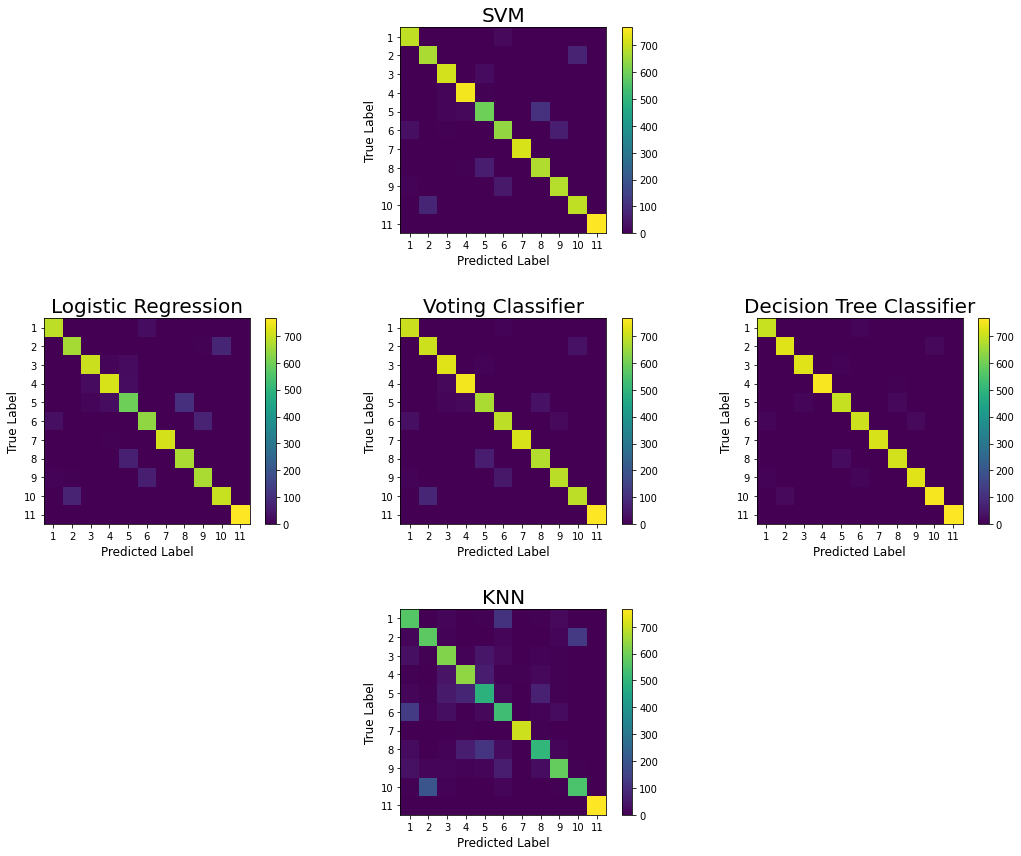

In [18]:
Confusion_Matrix_Plot(y_pred_list_arrays, y_pred_voting_array, y_test)

In [19]:
print(PCA(X_train, 4))

[[-5.58981672e+00 -8.39665799e-03  5.54223150e-01  4.39699313e+00]
 [-1.05131021e+01 -2.01464521e-01  6.51482254e-01 -3.79416710e-01]
 [-1.08625834e+01 -1.93776446e-01  6.24185898e-01 -9.17562215e-01]
 ...
 [-9.35677007e+00 -1.82713194e-01  8.72743331e-01  2.20371721e-01]
 [ 2.38628403e+01  2.11022254e+01 -3.02595871e+00 -9.94940444e+00]
 [-8.36902471e+00  7.44979690e-01  5.88735465e-01  2.35679939e+00]]


In [20]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca.fit(X_train)
print(pca.transform(X_train))

[[-5.58981672e+00  8.39665799e-03  5.54223150e-01  4.39699313e+00]
 [-1.05131021e+01  2.01464521e-01  6.51482254e-01 -3.79416710e-01]
 [-1.08625834e+01  1.93776446e-01  6.24185898e-01 -9.17562215e-01]
 ...
 [-9.35677007e+00  1.82713194e-01  8.72743331e-01  2.20371721e-01]
 [ 2.38628403e+01 -2.11022254e+01 -3.02595871e+00 -9.94940444e+00]
 [-8.36902471e+00 -7.44979690e-01  5.88735465e-01  2.35679939e+00]]
